## Transformer Archietecture
![attention_research_1.webp](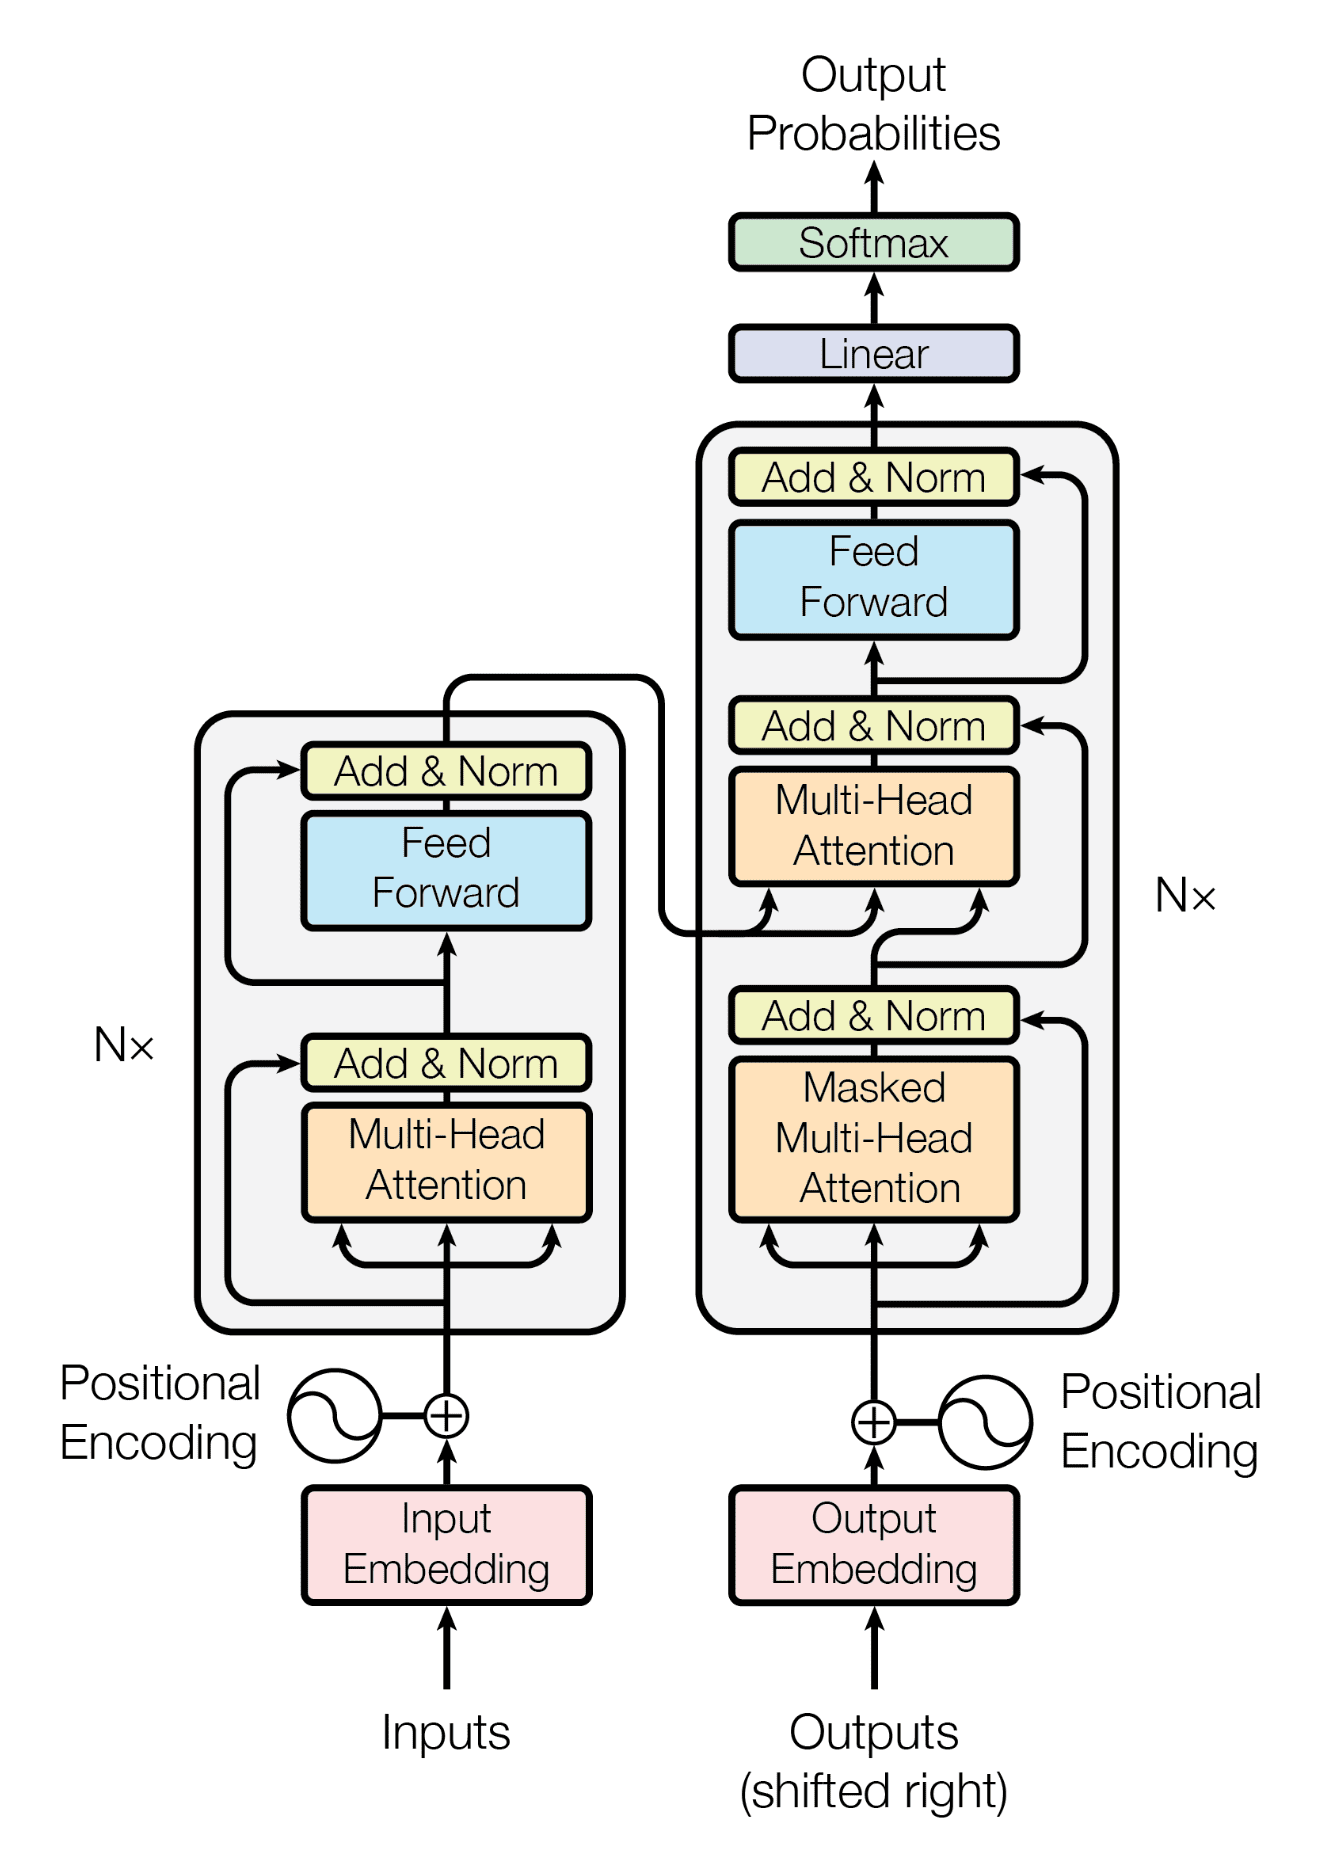![67ADh.png](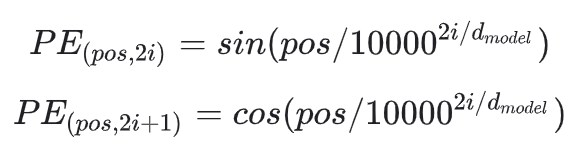![1_Elb5RGhgJ1FJfq5UmYD0QQ.png](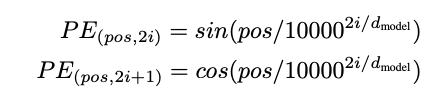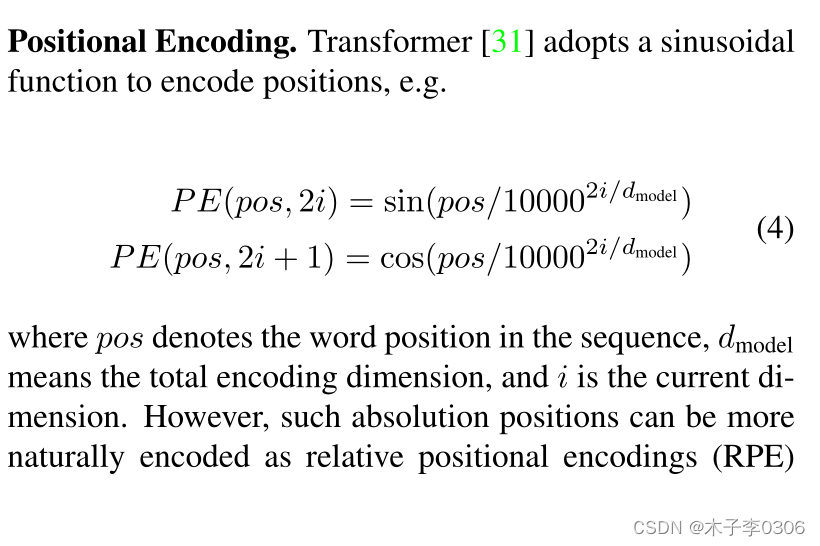)))

## Self Attention

In [ ]:
import numpy as np
import math

In [ ]:
# set dimensions of query , key and values
L , d_k , d_v = 4,8,8  # where L : total length of word : 'My name is Raj'

# generate query , key , values
q = np.random.randn(L,d_k)
k = np.random.randn(L,d_k)
v = np.random.randn(L,d_k)

In [ ]:
print('Q\n',q)
print('K\n',k)
print('V\n',v)

Q
 [[ 0.07438776  1.02571529 -0.02611451  0.0736889   0.52483036 -0.10210052
  -0.07141872 -2.41114042]
 [ 1.03449815  0.34443258 -0.54571408  0.10492301 -1.34465156 -0.58169318
  -1.55917183  1.03017474]
 [-0.11751536 -1.63422273  1.44101091  1.02639901  0.19576821 -0.62438435
   1.19185392  0.12577139]
 [ 0.8432831   0.89675971 -1.48511691  0.26095685  2.03551612  0.09998461
   0.82866334 -1.08262199]]
K
 [[-0.57754488 -0.21502925 -0.44036601  0.73029048  1.32030425  0.21128133
   0.90076978 -0.94079336]
 [ 1.2660383  -0.36843655 -0.319264    1.08948926  1.21021127 -0.0069196
  -0.27451352  0.32888863]
 [ 1.52487535 -1.06028282  0.88648211  0.26981885  0.82777427 -0.12683416
   0.81924414  0.42318275]
 [ 0.57612525  0.56699115 -0.57888769  0.48057432  0.0934547  -0.19838316
   1.16009937  0.4949806 ]]
V
 [[ 0.99334468  0.17016439  0.15678502  0.12488896 -0.44859701 -1.46247464
   0.26767973 -0.15305823]
 [-0.00514502  1.13380714 -0.82919403  0.3751961  -0.02733296  0.21056118
   0.26

In [ ]:
np.matmul(q,k.T)

array([[ 2.67721006, -0.33264171, -1.60885513, -0.53205915],
       [-4.62648049,  0.61489121, -1.12385039, -0.15152243],
       [ 1.61608724,  1.06694239,  4.37880299,  0.25187033],
       [ 4.63828984,  3.37485504,  0.98196125,  2.57526477]])

In [ ]:
# Why we need sqrt(d_k) in denominator
q.var(),k.var(),np.matmul(q,k.T).var()

(0.9908575386725116, 0.4629346017132778, 5.300079412969424)

In [ ]:
scaled = np.matmul(q,k.T)/math.sqrt(d_k)

In [ ]:
# after sqrt(d_k) in denominator
q.var(),k.var(),scaled.var()

(0.9908575386725116, 0.4629346017132778, 0.6625099266211779)

In [ ]:
scaled

array([[ 0.9465367 , -0.11760661, -0.56881619, -0.18811132],
       [-1.63570786,  0.21739687, -0.39734111, -0.05357127],
       [ 0.57137312,  0.3772211 ,  1.54814064,  0.08904961],
       [ 1.6398831 ,  1.19319144,  0.34717573,  0.91049359]])

## Masking
- This is to ensure words don't get context from words generated in the future.
- Not required in the encoders , but required in decoders.

In [ ]:
mask = np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [ ]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [ ]:
scaled + mask

array([[ 0.9465367 ,        -inf,        -inf,        -inf],
       [-1.63570786,  0.21739687,        -inf,        -inf],
       [ 0.57137312,  0.3772211 ,  1.54814064,        -inf],
       [ 1.6398831 ,  1.19319144,  0.34717573,  0.91049359]])

In [ ]:
# softmax
def softmax(x):
  return (np.exp(x).T /np.sum(np.exp(x),axis=-1)).T

In [ ]:
attention = softmax(scaled + mask)

In [ ]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.13550878, 0.86449122, 0.        , 0.        ],
       [0.22324468, 0.18384929, 0.59290603, 0.        ],
       [0.41728025, 0.26695134, 0.1145545 , 0.20121391]])

In [ ]:
new_v = np.matmul(attention,v)
new_v    # after attention values

array([[ 0.99334468,  0.17016439,  0.15678502,  0.12488896, -0.44859701,
        -1.46247464,  0.26767973, -0.15305823],
       [ 0.1301591 ,  1.00322509, -0.69558521,  0.34127729, -0.08441794,
        -0.01614986,  0.26831785,  0.03160886],
       [ 0.49589484, -0.38639313,  0.07078482,  0.79466555,  0.44364396,
        -0.71960402,  0.27382572, -0.26671551],
       [ 0.41142072,  0.51323348, -0.24711063,  0.42757072, -0.13446488,
        -0.69940439,  0.06255262, -0.060083  ]])

In [ ]:
v   # before attention values

array([[ 0.99334468,  0.17016439,  0.15678502,  0.12488896, -0.44859701,
        -1.46247464,  0.26767973, -0.15305823],
       [-0.00514502,  1.13380714, -0.82919403,  0.3751961 , -0.02733296,
         0.21056118,  0.26841788,  0.06055538],
       [ 0.46395519, -1.06733789,  0.31747044,  1.1769238 ,  0.92563742,
        -0.72832092,  0.27781673, -0.41099116],
       [-0.27263066,  1.30122347, -0.63388826,  0.69814262, -0.22867985,
        -0.307731  , -0.75851873,  0.17245687]])

## Function

In [ ]:
# softmax
def softmax(x):
  return (np.exp(x).T /np.sum(np.exp(x),axis=-1)).T

# self attention
def find_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q,k.T)/math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention,v)
  return out,attention

In [ ]:
# for decoder part mask is not none
values , attention = find_attention(q,k,v,mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.07438776  1.02571529 -0.02611451  0.0736889   0.52483036 -0.10210052
  -0.07141872 -2.41114042]
 [ 1.03449815  0.34443258 -0.54571408  0.10492301 -1.34465156 -0.58169318
  -1.55917183  1.03017474]
 [-0.11751536 -1.63422273  1.44101091  1.02639901  0.19576821 -0.62438435
   1.19185392  0.12577139]
 [ 0.8432831   0.89675971 -1.48511691  0.26095685  2.03551612  0.09998461
   0.82866334 -1.08262199]]
K
 [[-0.57754488 -0.21502925 -0.44036601  0.73029048  1.32030425  0.21128133
   0.90076978 -0.94079336]
 [ 1.2660383  -0.36843655 -0.319264    1.08948926  1.21021127 -0.0069196
  -0.27451352  0.32888863]
 [ 1.52487535 -1.06028282  0.88648211  0.26981885  0.82777427 -0.12683416
   0.81924414  0.42318275]
 [ 0.57612525  0.56699115 -0.57888769  0.48057432  0.0934547  -0.19838316
   1.16009937  0.4949806 ]]
V
 [[ 0.99334468  0.17016439  0.15678502  0.12488896 -0.44859701 -1.46247464
   0.26767973 -0.15305823]
 [-0.00514502  1.13380714 -0.82919403  0.3751961  -0.02733296  0.21056118
   0.26

# Multihead Attention
- Transformer Archietecture Used this attention

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
seq_len = 4
batch_size = 1
input_dim = 512
d_model = 512
x=torch.randn((batch_size,seq_len,input_dim))
x.shape

torch.Size([1, 4, 512])

In [ ]:
qkv_layer = nn.Linear(input_dim,3*d_model)

In [ ]:
qkv = qkv_layer(x)

In [ ]:
qkv.shape

torch.Size([1, 4, 1536])

In [ ]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size,seq_len,num_heads,3*head_dim)

In [ ]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [ ]:
qkv = qkv.permute(0,2,1,3) #[batch_size,num_heads,seq_len,3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [ ]:
# separate the query , key , value
q,k,v = qkv.chunk(3,dim=-1)
q.shape,k.shape,v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

In [ ]:
d_k = q.size()[-1]
scaled = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [ ]:
k.T.shape   # keys transposed

torch.Size([64, 4, 8, 1])

In [ ]:
y = torch.randn(2,3)
print(y)
print("After Transpose\n")
print(torch.transpose(y,0,1))
print(torch.transpose(y,1,0))

tensor([[-1.2538, -0.3894, -0.2420],
        [ 1.2441, -0.9545, -1.5999]])
After Transpose

tensor([[-1.2538,  1.2441],
        [-0.3894, -0.9545],
        [-0.2420, -1.5999]])
tensor([[-1.2538,  1.2441],
        [-0.3894, -0.9545],
        [-0.2420, -1.5999]])


In [ ]:
k.transpose(-1,-2) == k.transpose(-2,-1)

tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         ...,

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, 

In [ ]:
k.transpose(-1,-2).shape

torch.Size([1, 8, 64, 4])

In [ ]:
mask = torch.full(scaled.size(),float('-inf'))
mask = torch.triu(mask,diagonal=1)
mask[0][1]

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [ ]:
(scaled + mask)[0][0]

tensor([[ 0.1323,    -inf,    -inf,    -inf],
        [-0.2553, -0.0307,    -inf,    -inf],
        [-0.5126, -0.1400, -0.3203,    -inf],
        [ 0.3000,  0.0612, -0.5426,  0.1565]], grad_fn=<SelectBackward0>)

In [ ]:
scaled += mask

In [ ]:
# softmax formula
np.exp(0.5596) / (np.exp(0.5596) + np.exp(0.404))

0.5388217044001664

In [ ]:
attention = F.softmax(scaled,dim=-1)

In [ ]:
attention.shape

torch.Size([1, 8, 4, 4])

In [ ]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4441, 0.5559, 0.0000, 0.0000],
        [0.2730, 0.3962, 0.3308, 0.0000],
        [0.3242, 0.2553, 0.1396, 0.2809]], grad_fn=<SelectBackward0>)

In [ ]:
values = torch.matmul(attention,v)
# print(values)
values.shape

torch.Size([1, 8, 4, 64])

# Function

In [ ]:
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [ ]:
#for decoder mask is not none
values , attention = scaled_dot_product(q,k,v,mask=mask)

In [ ]:
values.shape

torch.Size([1, 8, 4, 64])

In [ ]:
attention.shape

torch.Size([1, 8, 4, 4])

In [ ]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4441, 0.5559, 0.0000, 0.0000],
        [0.2730, 0.3962, 0.3308, 0.0000],
        [0.3242, 0.2553, 0.1396, 0.2809]], grad_fn=<SelectBackward0>)

In [ ]:
values.shape

torch.Size([1, 8, 4, 64])

In [ ]:
values = values.reshape(batch_size,seq_len,num_heads*head_dim)
values.size()

torch.Size([1, 4, 512])

In [ ]:
linear_layer = nn.Linear(d_model,d_model)
out = linear_layer(values)
out.shape

torch.Size([1, 4, 512])

In [ ]:
out

tensor([[[-0.2432, -0.1539, -0.0793,  ..., -0.1755,  0.0463,  0.4145],
         [-0.4864,  0.0632,  0.4312,  ...,  0.1368,  0.0987, -0.3193],
         [-0.1118,  0.0021,  0.2839,  ...,  0.1119, -0.1536,  0.1996],
         [-0.0541, -0.0458,  0.1895,  ...,  0.2198,  0.3776,  0.4440]]],
       grad_fn=<ViewBackward0>)

## Class

In [ ]:
import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


## Input

In [ ]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])


## Positional Encoding


In [ ]:
import torch
import torch.nn as nn

max_seq_len = 10
d_model = 6

In [ ]:
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [ ]:
even_denominator = torch.pow(10000,even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
odd_i = torch.arange(1,d_model,2).float()
odd_i

tensor([1., 3., 5.])

In [ ]:
denominator = even_denominator

In [ ]:
position = torch.arange(max_seq_len,dtype=torch.float).reshape(max_seq_len,1)

In [ ]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [ ]:
even_PE = torch.sin(position/denominator)
odd_PE = torch.cos(position/denominator)

In [ ]:
even_PE.shape

torch.Size([10, 3])

In [ ]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [ ]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [ ]:
odd_PE.shape

torch.Size([10, 3])

In [ ]:
stacked = torch.stack([even_PE,odd_PE],dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [ ]:
PE = torch.flatten(stacked,start_dim=1,end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

# Class

In [ ]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [ ]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

## Layer Normalization

In [ ]:
import torch
from torch import nn

In [ ]:
inputs = torch.Tensor([[[0.2,0.1,0.3],[0.5,0.1,0.1]]])
B , S , E = inputs.size()    # B : Batch , S:Size, E: Embedding
inputs = inputs.reshape(S,B,E)
inputs.size()

torch.Size([2, 1, 3])

In [ ]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [ ]:
gamma.size(),beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [ ]:
dims = [-(i+1) for i in range(len(parameter_shape))]
dims

[-1, -2]

In [ ]:
mean = inputs.mean(dim=dims,keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [ ]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [ ]:
var = ((inputs - mean) ** 2).mean(dim=dims,keepdim=True)
epsilon = 1e-5
std = (var+epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [ ]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [ ]:
out = gamma * y + beta
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

## Class

In [ ]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out

In [ ]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[ 0.0076,  0.2832,  1.7048,  0.1639,  0.7700, -1.0521,  0.6582,
          -0.7414],
         [-0.5573, -1.6704,  0.3399, -2.7325, -0.2789, -1.3223,  1.1058,
           0.8435],
         [-0.9939,  1.2817,  1.1411,  0.5249,  0.3471, -1.3543,  0.4573,
          -1.1388]],

        [[-0.0467,  1.7364, -0.5627, -2.1280, -2.0486, -0.8733, -0.6700,
          -2.1951],
         [ 0.3017,  0.8406,  0.2073,  0.0276,  1.7160, -0.1454, -0.0391,
          -0.9722],
         [-1.1210,  1.0138,  1.5172,  0.0829,  0.1040,  1.8299,  0.0832,
           1.5158]],

        [[ 1.7885,  0.3147,  1.5122, -1.6034, -2.2350, -0.7240,  0.0564,
           0.2347],
         [-1.6400,  0.8177, -0.1991,  0.4885, -0.2464, -0.5980, -0.0995,
          -0.2805],
         [ 0.7704, -0.2794,  0.4436,  0.1367,  0.1464,  0.5930,  1.8582,
          -0.0980]],

        [[-1.2253,  1.3113, -0.3942, -1.8850,  0.0478, -1.1126, -0.0406,
          -0.7529],
         [ 2.0286, -0.5122, 

In [ ]:
layer_norm = LayerNormalization(inputs.size()[-1:])

In [ ]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[ 0.2243],
         [-0.5340],
         [ 0.0331]],

        [[-0.8485],
         [ 0.2421],
         [ 0.6282]],

        [[-0.0820],
         [-0.2197],
         [ 0.4463]],

        [[-0.5064],
         [ 0.4666],
         [ 0.6557]],

        [[ 0.0547],
         [ 0.1023],
         [ 0.2113]]])
Standard Deviation 
 (torch.Size([5, 3, 1])): 
 tensor([[[0.8135],
         [1.2330],
         [0.9785]],

        [[1.2414],
         [0.7319],
         [0.9421]],

        [[1.3076],
         [0.6853],
         [0.6254]],

        [[0.9142],
         [1.4400],
         [0.8794]],

        [[1.0855],
         [0.5815],
         [0.9140]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-0.2663,  0.0724,  1.8200, -0.0742,  0.6709, -1.5691,  0.5334,
          -1.1871],
         [-0.0189, -0.9217,  0.7088, -1.7830,  0.2070, -0.6393,  1.3300,
           1.1172],
         [-1.0496,  1.2760,  1.1323,  0.5025,  0.3208, -1.4179,  0.4335,
          -1.1977]],



In [ ]:
out[0].mean(), out[0].std()

(tensor(-2.4835e-08, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))

# Encoder Part Of Transformers

In [ ]:
import torch
import math
from torch import nn
import torch.nn.functional as F

def scaled_dot_product(q,k,v,mask=None):
  d_k = q.size()[-1]
  scaled = torch.matmul(q,k.transpose(-1,-2)) / math.sqrt(d_k)
  print(f"scaled.size() : {scaled.size()}")
  if mask is not None:
    print(f"-- ADDING MASK of shape {mask.size()} --")
    scaled += mask
  attention = F.softmax(scaled)
  values = torch.matmul(attention,v)
  return values,attention

class MultiheadAttention(nn.Module):
  def __init__(self,d_model,num_heads):
    super().__init__()
    self.d_model = d_model       # d_model = 512
    self.num_heads=num_heads     # number of heads = 8
    self.head_dims = d_model // num_heads   # each head dims : 512/8 =  64
    self.qkv_layer = nn.Linear(d_model,3*d_model)
    self.linear_layer = nn.Linear(d_model,d_model)

  def forward(self,x,mask=None):
    batch_size,max_seq_len,d_model = x.size()
    qkv = self.qkv_layer(x)
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.reshape(batch_size,max_seq_len,self.num_heads,3*self.head_dims)
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.permute(0,2,1,3)
    print(f"qkv.size(): {qkv.size()}")
    q,k,v = qkv.chunk(3,dim=-1)
    print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
    values,attention = scaled_dot_product(q,k,v,mask)
    print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
    values = values.reshape(batch_size,max_seq_len,self.num_heads*self.head_dims)
    print(f"values.size(): {values.size()}")
    out = self.linear_layer(values)
    print(f"out.size(): {out.size()}")
    return out


class LayerNormalization(nn.Module):
  def __init__(self,parameter_shape,eps=1e-5):
    super().__init__()
    self.parameter_shape = parameter_shape
    self.eps = eps
    self.gamma = nn.Parameter(torch.ones(parameter_shape))
    self.beta = nn.Parameter(torch.zeros(parameter_shape))

  def forward(self,inputs):
    dims = [-(i+1) for i in range(len(self.parameter_shape))]
    mean = inputs.mean(dim=dims,keepdim=True)
    print(f"Mean ({mean.size()})")
    var = ((inputs - mean) ** 2).mean(dim=dims , keepdim=True)
    std = (var + self.eps).sqrt()
    print(f"Standard Deviation  ({std.size()})")
    y = (inputs-mean) / std   #layer normalization
    out = self.gamma * y + self.beta
    print(f"self.gamma: {self.gamma.size()}, self.beta: {self.beta.size()}")
    print(f"out: {out.size()}")
    return out


class PositionalWiseFeedForward(nn.Module):
  def __init__(self,d_model,hidden,drop_prob=0.1):
    super(PositionalWiseFeedForward,self).__init__()
    self.linear1 = nn.Linear(d_model,hidden)
    self.linear2 = nn.Linear(hidden,d_model)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=drop_prob)

  def forward(self,x):
    x = self.linear1(x)
    print(f"x after first linear layer: {x.size()}")
    x = self.relu(x)
    print(f"x after activation: {x.size()}")
    x=self.dropout(x)
    print(f"x after dropout: {x.size()}")
    x=self.linear2(x)
    print(f"x after 2nd linear layer: {x.size()}")
    return x


class  EncoderLayer(nn.Module):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob):
    super(EncoderLayer,self).__init__()
    self.attention = MultiheadAttention(d_model=d_model,num_heads=num_heads)
    self.norm1 = LayerNormalization(parameter_shape=[d_model])
    self.dropout1 = nn.Dropout(p=drop_prob)
    self.ffn = PositionalWiseFeedForward(d_model=d_model,hidden=ffn_hidden,drop_prob=drop_prob)
    self.norm2 = LayerNormalization(parameter_shape=[d_model])
    self.dropout2 = nn.Dropout(p=drop_prob)

  def forward(self,x):
    residual_x = x
    print("------- ATTENTION 1 ------")
    x = self.attention(x,mask=None)
    print("------- DROPOUT 1 ------")
    x=self.dropout1(x)
    print("------- ADD AND LAYER NORMALIZATION 1 ------")
    x = self.norm1(x + residual_x)
    residual_x = x
    print("------- Feed Forward Neuaral Network ------")
    x = self.ffn(x)
    print("------- DROPOUT 2 ------")
    x = self.dropout2(x)
    print("------- ADD AND LAYER NORMALIZATION 2 ------")
    x = self.norm2( x + residual_x)
    return x


class Encoder(nn.Module):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob,num_layers):
    super().__init__()
    self.layers = nn.Sequential(*[EncoderLayer(d_model,ffn_hidden,num_heads,drop_prob) for _ in range(num_layers)])
  def forward(self,x):
    x = self.layers(x)
    return x


In [ ]:
d_model = 512
num_heads= 8
drop_prob= 0.1
batch_size = 30
max_seq_length = 200
ffn_hidden = 2048
num_layers = 5

encoder = Encoder(d_model,ffn_hidden,num_heads,drop_prob,num_layers)

In [ ]:
x = torch.randn((batch_size,max_seq_length,d_model))
out = encoder(x)

------- ATTENTION 1 ------
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): torch.Size([30, 200, 512])
out.size(): torch.Size([30, 200, 512])
------- DROPOUT 1 ------
------- ADD AND LAYER NORMALIZATION 1 ------
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))


<ipython-input-17-0a20e084de46>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attention = F.softmax(scaled)


self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
------- Feed Forward Neuaral Network ------
x after first linear layer: torch.Size([30, 200, 2048])
x after activation: torch.Size([30, 200, 2048])
x after dropout: torch.Size([30, 200, 2048])
x after 2nd linear layer: torch.Size([30, 200, 512])
------- DROPOUT 2 ------
------- ADD AND LAYER NORMALIZATION 2 ------
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
------- ATTENTION 1 ------
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): tor

## The Decoder

In [ ]:
import torch
import math
from torch import nn
import torch.nn.functional as F



def scaled_dot_product(q, k, v, mask=None):
    # q: 30 x 8 x 200 x 64, k: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64, mask 200 x 200
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k) # 30 x 8 x 200 x 200
    print(f"scaled.size() : {scaled.size()}")
    if mask is not None:
        print(f"-- ADDING MASK of shape {mask.size()} --")
        scaled += mask # 30 x 8 x 200 x 200
    attention = F.softmax(scaled, dim=-1) # 30 x 8 x 200 x 200
    values = torch.matmul(attention, v) # 30 x 8 x 200 x 64
    return values, attention


class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        #  x: 30 x 200 x 512
        x = self.linear1(x) #30 x 200 x 2048
        print(f"x after first linear layer: {x.size()}")
        x = self.relu(x) #30 x 200 x 2048
        print(f"x after relu layer: {x.size()}")
        x = self.dropout(x) #30 x 200 x 2048
        print(f"x after dropout layer: {x.size()}")
        x = self.linear2(x) #30 x 200 x 512
        print(f"x after 2nd linear layer: {x.size()}")
        return x #30 x 200 x 512


class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape)) # 512
        self.beta =  nn.Parameter(torch.zeros(parameters_shape)) # 512

    def forward(self, inputs):
        # inputs : 30 x 200 x 512
        dims = [-(i + 1) for i in range(len(self.parameters_shape))] # [-1]
        print(f"dims: {dims}")
        mean = inputs.mean(dim=dims, keepdim=True) #30 x 200 x 1
        print(f"Mean ({mean.size()})")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True) # 30 x 200 x 512
        std = (var + self.eps).sqrt() # 30 x 200 x 512
        print(f"Standard Deviation  ({std.size()})")
        y = (inputs - mean) / std # 30 x 200 x 512
        print(f"y: {y.size()}")
        out = self.gamma * y  + self.beta  # 30 x 200 x 512
        print(f"out: {out.size()}")
        return out

class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model) # 1536
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, sequence_length, d_model = x.size() # 30 x 200 x 512
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x) # 30 x 200 x 1536
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim) # 30 x 200 x 8 x 192
        print(f"qkv after reshape .size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 192
        print(f"qkv after permutation: {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1) # q: 30 x 8 x 200 x 64, k: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
        print(f"q: {q.size()}, k:{k.size()}, v:{v.size()}")
        values, attention = scaled_dot_product(q, k, v, mask) # values: 30 x 8 x 200 x 64
        print(f"values: {values.size()}, attention:{attention.size()}")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim) # 30 x 200 x 512
        print(f"values after reshaping: {values.size()}")
        out = self.linear_layer(values) # 30 x 200 x 512
        print(f"out after passing through linear layer: {out.size()}")
        return out # 30 x 200 x 512

class MultiHeadCrossAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.kv_layer = nn.Linear(d_model , 2 * d_model)  # 1024
        self.q_layer = nn.Linear(d_model , d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, y, mask=None):
        batch_size, sequence_length, d_model = x.size() # 30 x 200 x 512
        print(f"x.size(): {x.size()}")
        kv = self.kv_layer(x) # 30 x 200 x 1024
        print(f"kv.size(): {kv.size()}")
        q = self.q_layer(y) # 30 x 200 x 512
        print(f"q.size(): {q.size()}")
        kv = kv.reshape(batch_size, sequence_length, self.num_heads, 2 * self.head_dim)  # 30 x 200 x 8 x 128
        q = q.reshape(batch_size, sequence_length, self.num_heads, self.head_dim)  # 30 x 200 x 8 x 64
        kv = kv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 128
        q = q.permute(0, 2, 1, 3) # 30 x 8 x 200 x 64
        k, v = kv.chunk(2, dim=-1) # K: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
        values, attention = scaled_dot_product(q, k, v, mask) #  30 x 8 x 200 x 64
        print(f"values: {values.size()}, attention:{attention.size()}")
        values = values.reshape(batch_size, sequence_length, d_model) #  30 x 200 x 512
        out = self.linear_layer(values)  #  30 x 200 x 512
        print(f"out after passing through linear layer: {out.size()}")
        return out  #  30 x 200 x 512


class DecoderLayer(nn.Module):

    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.encoder_decoder_attention = MultiHeadCrossAttention(d_model=d_model, num_heads=num_heads)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm3 = LayerNormalization(parameters_shape=[d_model])
        self.dropout3 = nn.Dropout(p=drop_prob)

    def forward(self, x, y, decoder_mask):
        _y = y # 30 x 200 x 512
        print("MASKED SELF ATTENTION")
        y = self.self_attention(y, mask=decoder_mask) # 30 x 200 x 512
        print("DROP OUT 1")
        y = self.dropout1(y) # 30 x 200 x 512
        print("ADD + LAYER NORMALIZATION 1")
        y = self.norm1(y + _y) # 30 x 200 x 512

        _y = y # 30 x 200 x 512
        print("CROSS ATTENTION")
        y = self.encoder_decoder_attention(x, y, mask=None) #30 x 200 x 512
        print("DROP OUT 2")  #30 x 200 x 512
        y = self.dropout2(y)
        print("ADD + LAYER NORMALIZATION 2")
        y = self.norm2(y + _y)  #30 x 200 x 512

        _y = y  #30 x 200 x 512
        print("FEED FORWARD 1")
        y = self.ffn(y) #30 x 200 x 512
        print("DROP OUT 3")
        y = self.dropout3(y) #30 x 200 x 512
        print("ADD + LAYER NORMALIZATION 3")
        y = self.norm3(y + _y) #30 x 200 x 512
        return y #30 x 200 x 512

class SequentialDecoder(nn.Sequential):
    def forward(self, *inputs):
        x, y, mask = inputs
        for module in self._modules.values():
            y = module(x, y, mask) #30 x 200 x 512
        return y

class Decoder(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers=1):
        super().__init__()
        self.layers = SequentialDecoder(*[DecoderLayer(d_model, ffn_hidden, num_heads, drop_prob)
                                          for _ in range(num_layers)])

    def forward(self, x, y, mask):
        #x : 30 x 200 x 512
        #y : 30 x 200 x 512
        #mask : 200 x 200
        y = self.layers(x, y, mask)
        return y #30 x 200 x 512


In [ ]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

x = torch.randn( (batch_size, max_sequence_length, d_model) ) # English sentence positional encoded
y = torch.randn( (batch_size, max_sequence_length, d_model) ) # Kannada sentence positional encoded
mask = torch.full([max_sequence_length, max_sequence_length] , float('-inf'))
mask = torch.triu(mask, diagonal=1)
decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)
out = decoder(x, y, mask)

MASKED SELF ATTENTION
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv after reshape .size(): torch.Size([30, 200, 8, 192])
qkv after permutation: torch.Size([30, 8, 200, 192])
q: torch.Size([30, 8, 200, 64]), k:torch.Size([30, 8, 200, 64]), v:torch.Size([30, 8, 200, 64])
scaled.size() : torch.Size([30, 8, 200, 200])
-- ADDING MASK of shape torch.Size([200, 200]) --
values: torch.Size([30, 8, 200, 64]), attention:torch.Size([30, 8, 200, 200])
values after reshaping: torch.Size([30, 200, 512])
out after passing through linear layer: torch.Size([30, 200, 512])
DROP OUT 1
ADD + LAYER NORMALIZATION 1
dims: [-1]
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
out: torch.Size([30, 200, 512])
CROSS ATTENTION
x.size(): torch.Size([30, 200, 512])
kv.size(): torch.Size([30, 200, 1024])
q.size(): torch.Size([30, 200, 512])
scaled.size() : torch.Size([30, 8, 200, 200])
values: torch.Size([30, 8, 200, 64]),

In [ ]:
mask.shape

torch.Size([200, 200])

## Sentence Tokenization

In [ ]:
!unzip /content/drive/MyDrive/v3.zip

Archive:  /content/drive/MyDrive/v3.zip
   creating: v2/
   creating: v2/en-kn/
  inflating: v2/en-kn/train.kn       
  inflating: v2/en-kn/train.en       
   creating: v2/en-bn/
  inflating: v2/en-bn/train.en       
  inflating: v2/en-bn/train.bn       
   creating: v2/en-as/
  inflating: v2/en-as/train.as       
  inflating: v2/en-as/train.en       
   creating: v2/en-ta/
  inflating: v2/en-ta/train.ta       
  inflating: v2/en-ta/train.en       
   creating: v2/en-or/
  inflating: v2/en-or/train.or       
  inflating: v2/en-or/train.en       
   creating: v2/en-mr/
  inflating: v2/en-mr/train.mr       
  inflating: v2/en-mr/train.en       
   creating: v2/en-te/
  inflating: v2/en-te/train.te       
   creating: v2/en-te/en-kn/
  inflating: v2/en-te/en-kn/train.kn  
  inflating: v2/en-te/en-kn/train.en  
   creating: v2/en-te/en-bn/
  inflating: v2/en-te/en-bn/train.en  

In [ ]:
import torch
import numpy as np

english_file = "/content/v2/en-kn/train.en"
kannada_file = "/content/v2/en-kn/train.kn"

START_TOKEN = "<START>"
PADDING_TOKEN = "<PADDING>"
END_TOKEN = "<END>"


kannada_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                      'ँ', 'ఆ', 'ఇ', 'ా', 'ి', 'ీ', 'ు', 'ూ',
                      'ಅ', 'ಆ', 'ಇ', 'ಈ', 'ಉ', 'ಊ', 'ಋ', 'ೠ', 'ಌ', 'ಎ', 'ಏ', 'ಐ', 'ಒ', 'ಓ', 'ಔ',
                      'ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ',
                      'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ',
                      'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ',
                      'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ',
                      'ಪ', 'ಫ', 'ಬ', 'ಭ', 'ಮ',
                      'ಯ', 'ರ', 'ಱ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಸ', 'ಹ',
                      '಼', 'ಽ', 'ಾ', 'ಿ', 'ೀ', 'ು', 'ೂ', 'ೃ', 'ೄ', 'ೆ', 'ೇ', 'ೈ', 'ೊ', 'ೋ', 'ೌ', '್', 'ೕ', 'ೖ', 'ೞ', 'ೣ', 'ಂ', 'ಃ',
                      '೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯', PADDING_TOKEN, END_TOKEN]

english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        '[','\\',']','^','_','`',

                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]





In [ ]:
text = 'ಕನ್ನಡ'
list(text)

['ಕ', 'ನ', '್', 'ನ', 'ಡ']

In [ ]:
'ಕ' + 'ಾ'

'ಕಾ'

In [ ]:
index_to_kannada = {k:v for k,v in enumerate(kannada_vocabulary)}
kannada_to_index = {v:k for k,v in enumerate(kannada_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [ ]:
with open(english_file, 'r') as file:
    english_sentences = file.readlines()
with open(kannada_file, 'r') as file:
    kannada_sentences = file.readlines()

# Limit Number of sentences
TOTAL_SENTENCES = 100000
english_sentences = english_sentences[:TOTAL_SENTENCES]
kannada_sentences = kannada_sentences[:TOTAL_SENTENCES]
english_sentences = [sentence.rstrip('\n') for sentence in english_sentences]
kannada_sentences = [sentence.rstrip('\n') for sentence in kannada_sentences]

In [ ]:
english_sentences[:10]

['Hes a scientist.',
 "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '8 lakh crore have been looted.',
 'I read a lot into this as well.',
 "She was found dead with the phone's battery exploded close to her head the following morning.",
 'How did mankind come under Satans rival sovereignty?',
 'And then I became Prime Minister.',
 'What about corruption?',
 'No differences',
 '"""The shooting of the film is 90 percent done."']

In [ ]:
kannada_sentences[:10]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.',
 'ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.',
 'ಆಕೆಯ ತಲೆಯ ಹತ್ತಿರ ಇರಿಸಿಕೊಂಡಿದ್ದ ಫೋನ್\u200cನ ಬ್ಯಾಟರಿ ಸ್ಫೋಟಗೊಂಡು ಆಕೆ ಮೃತಪಟ್ಟಿದ್ದಾಳೆ ಎನ್ನಲಾಗಿದೆ.',
 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?',
 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.',
 'ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?',
 '‘ಅನುಪಾತದಲ್ಲಿ ವ್ಯತ್ಯಾಸವಿಲ್ಲ’',
 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.']

In [ ]:
max(len(x) for x in kannada_sentences), max(len(x) for x in english_sentences),

(639, 722)

In [ ]:
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length Kannada: {np.percentile([len(x) for x in kannada_sentences], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}" )

97th percentile length Kannada: 172.0
97th percentile length English: 179.0


In [ ]:
max_sequence_length = 200

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(kannada_sentences)):
    kannada_sentence, english_sentence = kannada_sentences[index], english_sentences[index]
    if is_valid_length(kannada_sentence, max_sequence_length) \
      and is_valid_length(english_sentence, max_sequence_length) \
      and is_valid_tokens(kannada_sentence, kannada_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(kannada_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 100000
Number of valid sentences: 81916


In [ ]:
kannada_sentences = [kannada_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [ ]:
kannada_sentences[:3]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.']

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, english_sentences, kannada_sentences):
        self.english_sentences = english_sentences
        self.kannada_sentences = kannada_sentences

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.kannada_sentences[idx]

In [ ]:
dataset = TextDataset(english_sentences, kannada_sentences)

In [ ]:
len(dataset)

81916

In [ ]:
dataset[1]

("'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"')

In [ ]:
batch_size = 3
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [ ]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('Hes a scientist.', "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha", '8 lakh crore have been looted.'), ('ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.', '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"', 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.')]
[('I read a lot into this as well.', 'How did mankind come under Satans rival sovereignty?', 'And then I became Prime Minister.'), ('ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.', 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?', 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.')]
[('What about corruption?', '"""The shooting of the film is 90 percent done."', 'the Special Statute'), ('ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?', 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.', 'ವಿಶೇಷ ಕಾನೂನು')]
[('"Then the king said to Ittai the Gittite, ""Why do you also go with us? Return, and stay with the king. for you are a foreigner, and also an exile. Return to your own place."', 'What happened at the UN Ge

In [ ]:
def tokenize(sentence, language_to_index, start_token=True, end_token=True):
    sentence_word_indicies = [language_to_index[token] for token in list(sentence)]
    if start_token:
        sentence_word_indicies.insert(0, language_to_index[START_TOKEN])
    if end_token:
        sentence_word_indicies.append(language_to_index[END_TOKEN])
    for _ in range(len(sentence_word_indicies), max_sequence_length):
        sentence_word_indicies.append(language_to_index[PADDING_TOKEN])
    return torch.tensor(sentence_word_indicies)

In [ ]:
batch

[('It has been under discussion for a long time.',
  'Buses cannot get there.',
  'Why then this tradition was not thought of?'),
 ('ಎಂಬುದು ಬಹಳ ದೀರ್ಘ ಕಾಲದಿಂದಲೂ ಚರ್ಚಿತವಾಗುತ್ತಿರುವ ವಿಷಯ.',
  'ಇಲ್ಲಿಗೆ ಬರಲು ಬಸ್ ಸೌಕರ್ಯವೂ ಇಲ್ಲ.',
  'ಆ ಪರಂಪರೆ ಯಾಕೆ ಮುನ್ನೆಲೆಗೆ ಬರಲಿಲ್ಲ?')]

In [ ]:
eng_tokenized, kn_tokenized = [], []
for sentence_num in range(batch_size):
    eng_sentence, kn_sentence = batch[0][sentence_num], batch[1][sentence_num]
    eng_tokenized.append( tokenize(eng_sentence, english_to_index, start_token=False, end_token=False) )
    kn_tokenized.append( tokenize(kn_sentence, kannada_to_index, start_token=True, end_token=True) )
eng_tokenized = torch.stack(eng_tokenized)
kn_tokenized = torch.stack(kn_tokenized)

In [ ]:
NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    print(f"encoder_self_attention_mask {encoder_self_attention_mask.size()}: {encoder_self_attention_mask[0, :10, :10]}")
    print(f"decoder_self_attention_mask {decoder_self_attention_mask.size()}: {decoder_self_attention_mask[0, :10, :10]}")
    print(f"decoder_cross_attention_mask {decoder_cross_attention_mask.size()}: {decoder_cross_attention_mask[0, :10, :10]}")
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [ ]:
create_masks(batch[0], batch[1])

encoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
decoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[ 0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09, -1.0000e+09,
         -1.0000e

(tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09]],
 
         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
    

In [ ]:
def get_device():
  return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')



class SentenceEmbedding(nn.Module):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = nn.Embedding(self.vocab_size, d_model)
        self.language_to_index = language_to_index
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = nn.Dropout(p=0.1)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN

    def batch_tokenize(self, batch, start_token=True, end_token=True):

        def tokenize(sentence, start_token=True, end_token=True):
            sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index[self.START_TOKEN])
            if end_token:
                sentence_word_indicies.append(self.language_to_index[self.END_TOKEN])
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index[self.PADDING_TOKEN])
            return torch.tensor(sentence_word_indicies)



        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = torch.stack(tokenized)
        return tokenized.to(get_device())

    def forward(self, x, end_token=True): # sentence
        x = self.batch_tokenize(x ,end_token)
        x = self.embedding(x)
        pos = self.position_encoder().to(get_device())
        x = self.dropout(x + pos)
        return x

## The Complete Guide Of Transformers

In [ ]:
%%writefile transformer.py
import numpy as np
import torch
import math
from torch import nn
import torch.nn.functional as F

def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled.permute(1, 0, 2, 3) + mask
        scaled = scaled.permute(1, 0, 2, 3)
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = (torch.arange(self.max_sequence_length)
                          .reshape(self.max_sequence_length, 1))
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE


class SentenceEmbedding(nn.Module):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = nn.Embedding(self.vocab_size, d_model)
        self.language_to_index = language_to_index
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = nn.Dropout(p=0.1)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN

    def batch_tokenize(self, batch, start_token, end_token):

        def tokenize(sentence, start_token, end_token):
            sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index[self.START_TOKEN])
            if end_token:
                sentence_word_indicies.append(self.language_to_index[self.END_TOKEN])
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index[self.PADDING_TOKEN])
            return torch.tensor(sentence_word_indicies)

        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = torch.stack(tokenized)
        return tokenized.to(get_device())

    def forward(self, x, start_token, end_token): # sentence
        x = self.batch_tokenize(x, start_token, end_token)
        x = self.embedding(x)
        pos = self.position_encoder().to(get_device())
        x = self.dropout(x + pos)
        return x


class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask):
        batch_size, sequence_length, d_model = x.size()
        qkv = self.qkv_layer(x)
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3)
        q, k, v = qkv.chunk(3, dim=-1)
        values, attention = scaled_dot_product(q, k, v, mask)
        values = values.permute(0, 2, 1, 3).reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        out = self.linear_layer(values)
        return out

class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        y = (inputs - mean) / std
        out = self.gamma * y + self.beta
        return out

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x


class EncoderLayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

    def forward(self, x, self_attention_mask):
        residual_x = x.clone()
        x = self.attention(x, mask=self_attention_mask)
        x = self.dropout1(x)
        x = self.norm1(x + residual_x)
        residual_x = x.clone()
        x = self.ffn(x)
        x = self.dropout2(x)
        x = self.norm2(x + residual_x)
        return x

class SequentialEncoder(nn.Sequential):
    def forward(self, *inputs):
        x, self_attention_mask  = inputs
        for module in self._modules.values():
            x = module(x, self_attention_mask)
        return x

class Encoder(nn.Module):
    def __init__(self,
                 d_model,
                 ffn_hidden,
                 num_heads,
                 drop_prob,
                 num_layers,
                 max_sequence_length,
                 language_to_index,
                 START_TOKEN,
                 END_TOKEN,
                 PADDING_TOKEN):
        super().__init__()
        self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.layers = SequentialEncoder(*[EncoderLayer(d_model, ffn_hidden, num_heads, drop_prob)
                                      for _ in range(num_layers)])

    def forward(self, x, self_attention_mask, start_token, end_token):
        x = self.sentence_embedding(x, start_token, end_token)
        x = self.layers(x, self_attention_mask)
        return x

class MultiHeadCrossAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.kv_layer = nn.Linear(d_model , 2 * d_model)
        self.q_layer = nn.Linear(d_model , d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, y, mask):
        batch_size, sequence_length, d_model = x.size() # in practice, this is the same for both languages...so we can technically combine with normal attention
        kv = self.kv_layer(x)
        q = self.q_layer(y)
        kv = kv.reshape(batch_size, sequence_length, self.num_heads, 2 * self.head_dim)
        q = q.reshape(batch_size, sequence_length, self.num_heads, self.head_dim)
        kv = kv.permute(0, 2, 1, 3)
        q = q.permute(0, 2, 1, 3)
        k, v = kv.chunk(2, dim=-1)
        values, attention = scaled_dot_product(q, k, v, mask) # We don't need the mask for cross attention, removing in outer function!
        values = values.permute(0, 2, 1, 3).reshape(batch_size, sequence_length, d_model)
        out = self.linear_layer(values)
        return out


class DecoderLayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.layer_norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)

        self.encoder_decoder_attention = MultiHeadCrossAttention(d_model=d_model, num_heads=num_heads)
        self.layer_norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.layer_norm3 = LayerNormalization(parameters_shape=[d_model])
        self.dropout3 = nn.Dropout(p=drop_prob)

    def forward(self, x, y, self_attention_mask, cross_attention_mask):
        _y = y.clone()
        y = self.self_attention(y, mask=self_attention_mask)
        y = self.dropout1(y)
        y = self.layer_norm1(y + _y)

        _y = y.clone()
        y = self.encoder_decoder_attention(x, y, mask=cross_attention_mask)
        y = self.dropout2(y)
        y = self.layer_norm2(y + _y)

        _y = y.clone()
        y = self.ffn(y)
        y = self.dropout3(y)
        y = self.layer_norm3(y + _y)
        return y


class SequentialDecoder(nn.Sequential):
    def forward(self, *inputs):
        x, y, self_attention_mask, cross_attention_mask = inputs
        for module in self._modules.values():
            y = module(x, y, self_attention_mask, cross_attention_mask)
        return y

class Decoder(nn.Module):
    def __init__(self,
                 d_model,
                 ffn_hidden,
                 num_heads,
                 drop_prob,
                 num_layers,
                 max_sequence_length,
                 language_to_index,
                 START_TOKEN,
                 END_TOKEN,
                 PADDING_TOKEN):
        super().__init__()
        self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.layers = SequentialDecoder(*[DecoderLayer(d_model, ffn_hidden, num_heads, drop_prob) for _ in range(num_layers)])

    def forward(self, x, y, self_attention_mask, cross_attention_mask, start_token, end_token):
        y = self.sentence_embedding(y, start_token, end_token)
        y = self.layers(x, y, self_attention_mask, cross_attention_mask)
        return y

class Transformer(nn.Module):
    def __init__(self,
                d_model,
                ffn_hidden,
                num_heads,
                drop_prob,
                num_layers,
                max_sequence_length,
                kn_vocab_size,
                english_to_index,
                kannada_to_index,
                START_TOKEN,
                END_TOKEN,
                PADDING_TOKEN
                ):
        super().__init__()
        self.encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, kannada_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.linear = nn.Linear(d_model, kn_vocab_size)
        self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    def forward(self,
                x,
                y,
                encoder_self_attention_mask=None,
                decoder_self_attention_mask=None,
                decoder_cross_attention_mask=None,
                enc_start_token=False,
                enc_end_token=False,
                dec_start_token=False, # We should make this true
                dec_end_token=False): # x, y are batch of sentences
        x = self.encoder(x, encoder_self_attention_mask, start_token=enc_start_token, end_token=enc_end_token)
        out = self.decoder(x, y, decoder_self_attention_mask, decoder_cross_attention_mask, start_token=dec_start_token, end_token=dec_end_token)
        out = self.linear(out)
        return out

Writing transformer.py
